# Validating Full Model With Many Samples

We end this series with our biggest run yet: the full model with 10,000 samples for each halo's likelihood integral.

Contents:
- [Full Model With Many Samples](#Full-Model-With-Many-Samples)
- [Discussion](#Discussion)

### Full Model With Many Samples

**Note:** this job spent 2:56:59h in the queue and 4:37:53h running on 8 nodes, 16 cores/node, 20 hypersamples/core, 10000 samples/hypersample.

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import rc
rc('text', usetex=True)

In [7]:
data = np.loadtxt('fullexp10000.txt')
print len(data)

2560


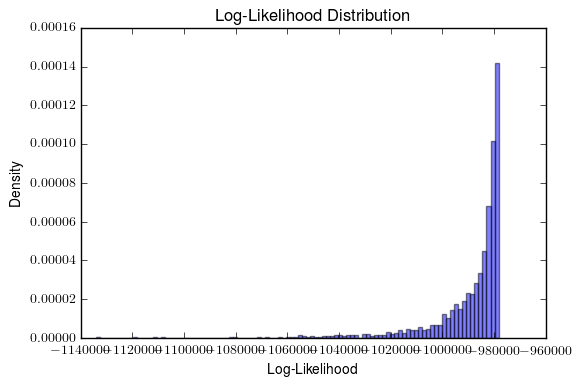

In [35]:
plt.title('Log-Likelihood Distribution')
plt.xlabel('Log-Likelihood')
plt.ylabel('Density')
plt.hist(data[:,4], bins=100, alpha=0.5, normed=True);

In [64]:
np.sort(data[:,4])[-10:]

array([-978511.3526231 , -978496.61001339, -978493.21739889,
       -978449.45734936, -978441.83472698, -978427.76802535,
       -978416.49569192, -978358.49977994, -978321.29039203,
       -978236.45537907])

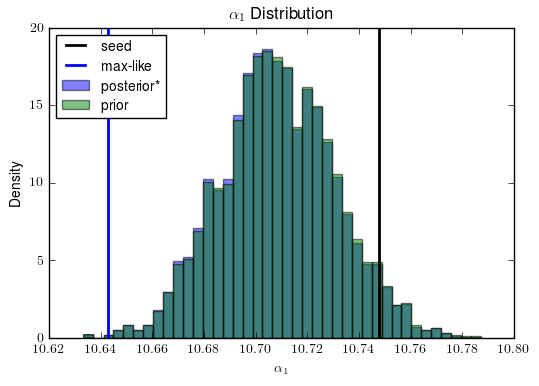

In [70]:
from bigmali.hyperparameter import get

min_weight = np.min(data[:,4])
weight_range = np.max(data[:,4]) - min_weight
a1,a2,a3,a4,S = get()
ind = np.argmax(data[:,4])

top10percentile = data[data[:,4] > np.percentile(data[:,4], 90)]
plt.title(r'$\alpha_1$ Distribution')
plt.xlabel(r'$\alpha_1$')
plt.ylabel('Density')
plt.hist(data[:,0], bins=40, alpha=0.5, normed=True, weights=((data[:,4]-min_weight)/ weight_range), label='posterior*')
plt.hist(data[:,0], bins=40, alpha=0.5, normed=True, label='prior')
# plt.hist(data[:,0], bins=10, alpha=0.3, normed=True, label='top 10%')
plt.gca().axvline(a1, color ='k', linewidth=2, label='seed')
plt.gca().axvline(data[:,0][ind], color ='blue', linewidth=2, label='max-like')
plt.legend(loc=2, fontsize=10);

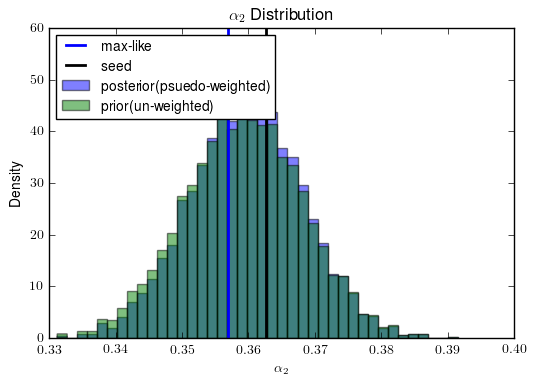

In [71]:
plt.title(r'$\alpha_2$ Distribution')
plt.xlabel(r'$\alpha_2$')
plt.ylabel('Density')
plt.hist(data[:,1], bins=40, alpha=0.5, normed=True, weights=((data[:,4]-min_weight)/ weight_range), label='posterior(psuedo-weighted)')
plt.hist(data[:,1], bins=40, alpha=0.5, normed=True, label='prior(un-weighted)')
# plt.hist(data[:,1], bins=10, alpha=0.3, normed=True, label='top 10%')
plt.gca().axvline(data[:,1][ind], color ='blue', linewidth=2, label='max-like')
plt.gca().axvline(a2, color ='k', linewidth=2, label='seed')
plt.legend(loc=2, fontsize=10);

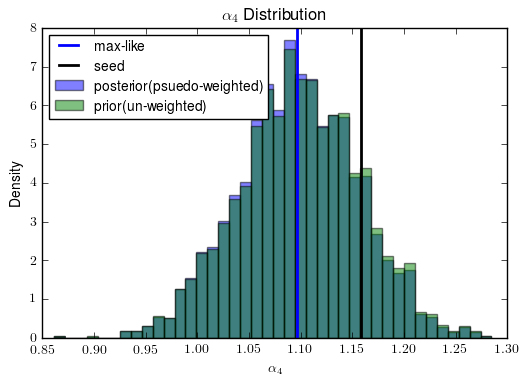

In [75]:
plt.title(r'$\alpha_4$ Distribution')
plt.xlabel(r'$\alpha_4$')
plt.ylabel('Density')
plt.hist(data[:,2], bins=40, alpha=0.5, normed=True, weights=((data[:,4]-min_weight)/ weight_range), label='posterior(psuedo-weighted)')
plt.hist(data[:,2], bins=40, alpha=0.5, normed=True, label='prior(un-weighted)')
# plt.hist(data[:,2], bins=10, alpha=0.3, normed=True, label='top 10%')
plt.gca().axvline(data[:,2][ind], color ='blue', linewidth=2, label='max-like')
plt.gca().axvline(a4, color ='k', linewidth=2, label='seed')
plt.legend(loc=2, fontsize=10);

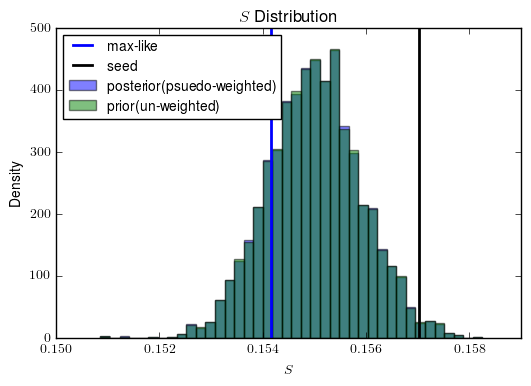

In [74]:
plt.title(r'$S$ Distribution')
plt.xlabel(r'$S$')
plt.ylabel('Density')
plt.hist(data[:,3], bins=40, alpha=0.5, normed=True, weights=((data[:,4]-min_weight)/ weight_range), label='posterior(psuedo-weighted)')
plt.hist(data[:,3], bins=40, alpha=0.5, normed=True, label='prior(un-weighted)')
# plt.hist(data[:,3], bins=10, alpha=0.3, normed=True, label='top 10%')
plt.gca().axvline(data[:,3][ind], color ='blue', linewidth=2, label='max-like')
plt.gca().axvline(S, color ='k', linewidth=2, label='seed')
plt.legend(loc=2, fontsize=10);

# Discussion

- **Concern 1:** There is still bias which prevents the hyperseed from being resolved. This bias seems to be consistent with the other experiments. We do not have a great explanation for it.
- **Concern 2:** Even with many samples the log-likelihood weight distribution will make generating a posterior distribution intractible ($2^{300}$ difference in weights etc.).

This is the end of the series. We will have to discuss these concerns further and decide how to move forward.